In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import sys
import os
sys.path.append(os.path.abspath('..'))

import src.data_processing as dp
import src.feature_engineering as fe
import src.genre_classification as gc
import src.validation as val

#Load trained models
with open('../models/knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)
    
with open('../models/pca_model.pkl', 'rb') as f:
    pca_model = pickle.load(f)
    
with open('../models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

#Load data
original_df1 = pd.read_csv('../data/raw/spotify_dataset1.csv')
original_df2 = pd.read_csv('../data/raw/spotify_dataset2.csv')
combined_df = pd.read_csv('../data/processed/combined_data.csv')
processed_df = pd.read_csv('../data/processed/processed_data.csv')
pca_df = pd.read_csv('../data/processed/pca_data.csv')

/var/folders/30/zl5fslfn5vb5f1_06wdy5p280000gn/T/ipykernel_63600/1709024350.py:32: DtypeWarning: Columns (2,6,9,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('../data/processed/combined_data.csv')
/var/folders/30/zl5fslfn5vb5f1_06wdy5p280000gn/T/ipykernel_63600/1709024350.py:33: DtypeWarning: Columns (2,6,9,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_df = pd.read_csv('../data/processed/processed_data.csv')


In [18]:
processed_df.head()

,track_id,artist_name,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,group_cols,genre,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Comedy by Gen Hoshino,"['acoustic', 'j-pop', 'singer-songwriter']",230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Ghost - Acoustic by Ben Woodward,['acoustic'],149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,To Begin Again by Ingrid Michaelson;ZAYN,['acoustic'],210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Can't Help Falling In Love by Kina Grannis,"['acoustic', 'folk']",201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Hold On by Chord Overstreet,"['acoustic', 'country', 'pop']",198.853


In [3]:
len(processed_df)

224471

In [23]:
features = ['acousticness', 'danceability', 'duration_sec', 'energy', 
            'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


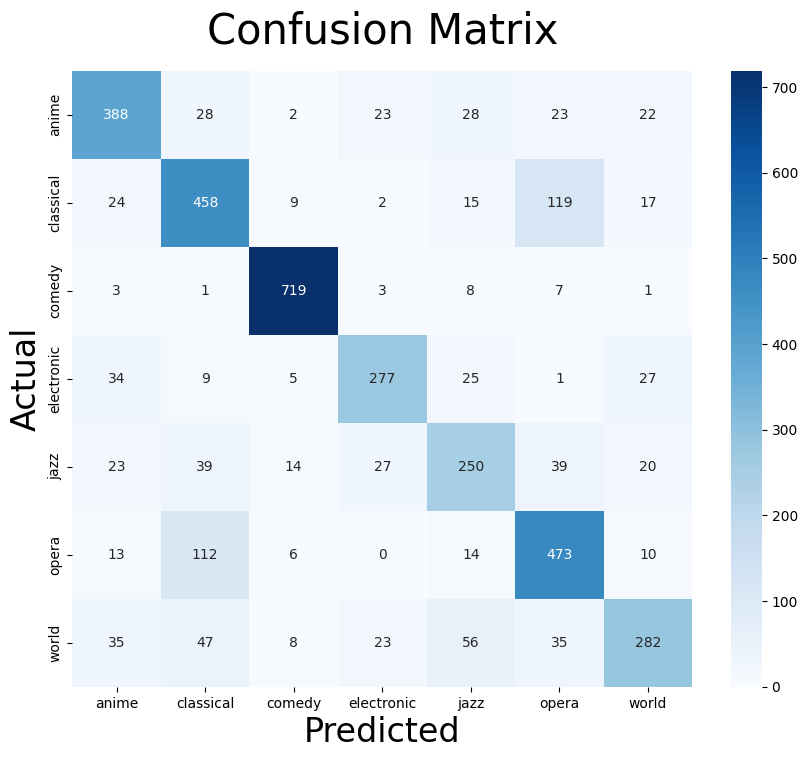

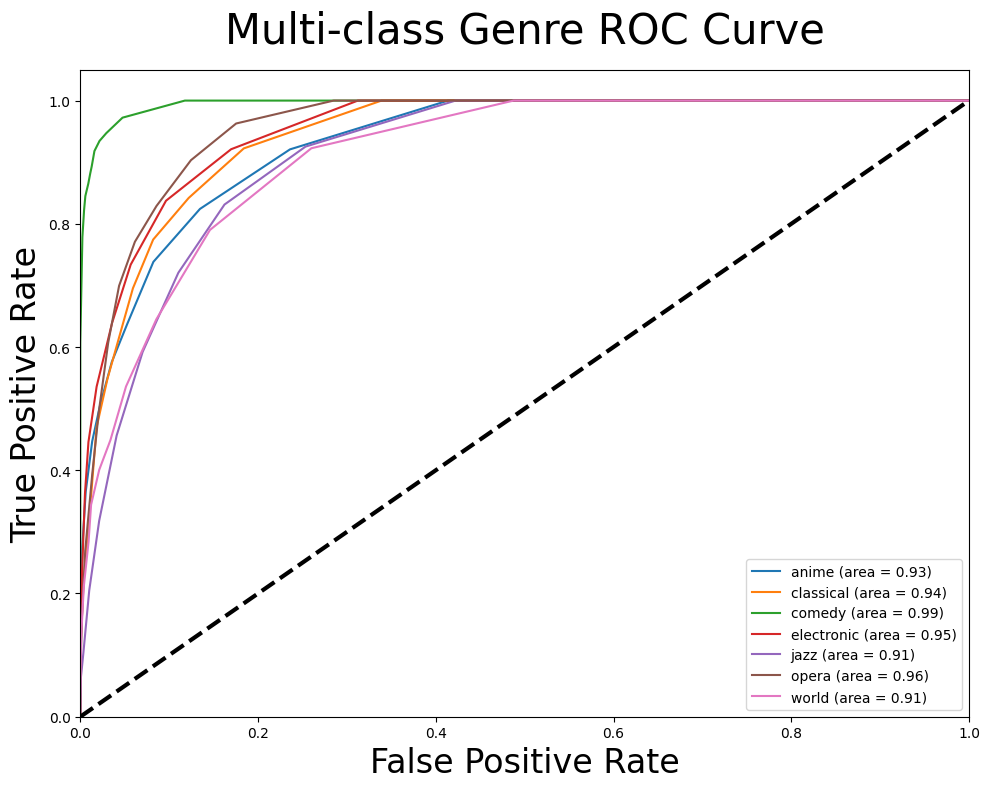

In [75]:
X_pca, y = gc.plot_confusion_matrix('images/confusion_matrix.png', processed_df, scaler, pca_model, knn_model, features, gc.get_primary_genre, 7)

#ROC
fpr, tpr, roc_auc = val.plot_roc_curve(knn_model, X_pca, y, 'images/roc_curve.png')

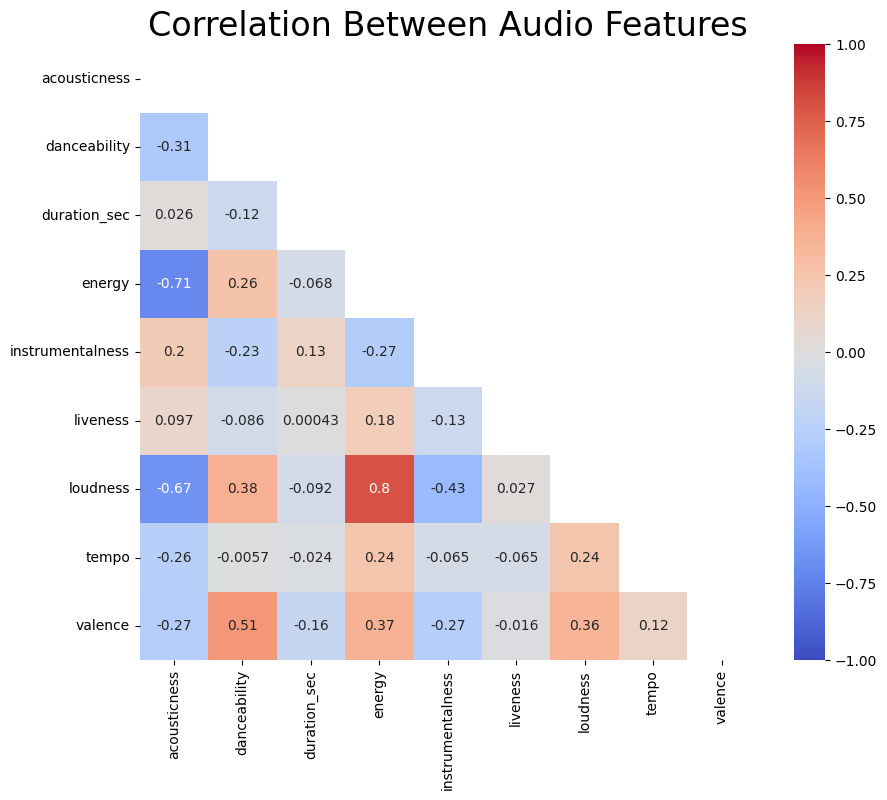

In [ ]:
#Visualize the correlation between all the relevant features
plt.figure(figsize=(10, 8))
corr = processed_df[features].corr()


#Using triu() (upper triangular) to provide the mask for the plot
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation Between Audio Features', fontsize=24)
plt.savefig('images/feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

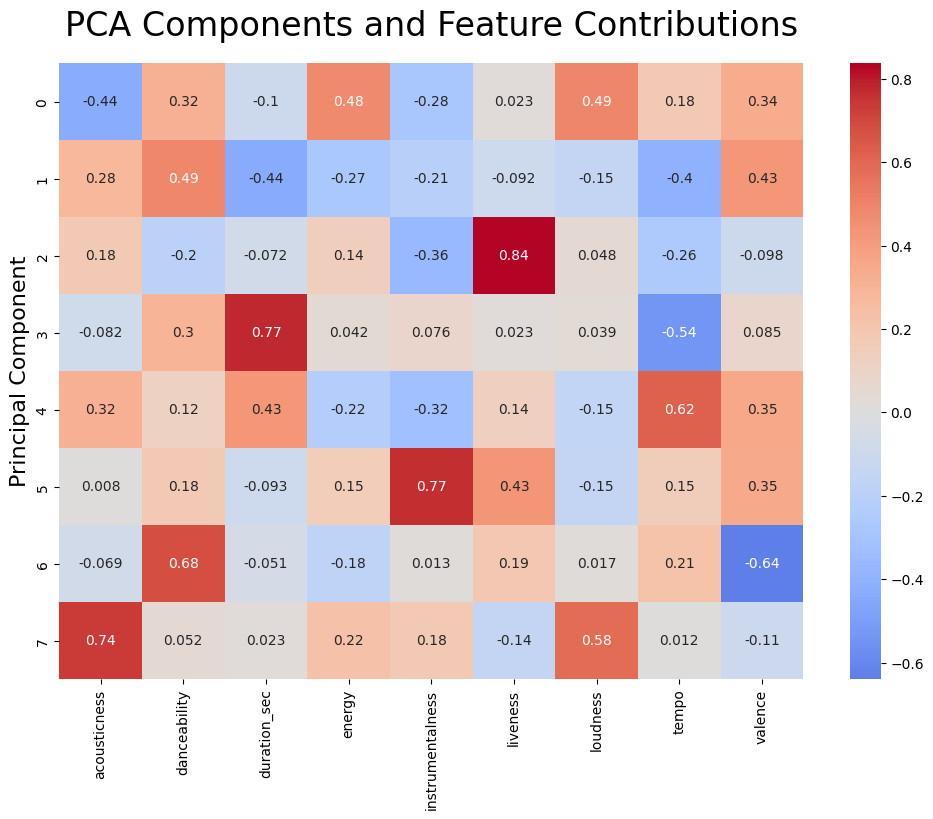

In [71]:
#Visualize what each PCA component represents
pca_components = pd.DataFrame(
    pca_model.components_,
    columns=features
)

plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Components and Feature Contributions', fontsize=24, pad=20)
plt.ylabel('Principal Component', fontsize=16)
plt.savefig('images/pca_components.png', dpi=300, bbox_inches='tight')
plt.show()

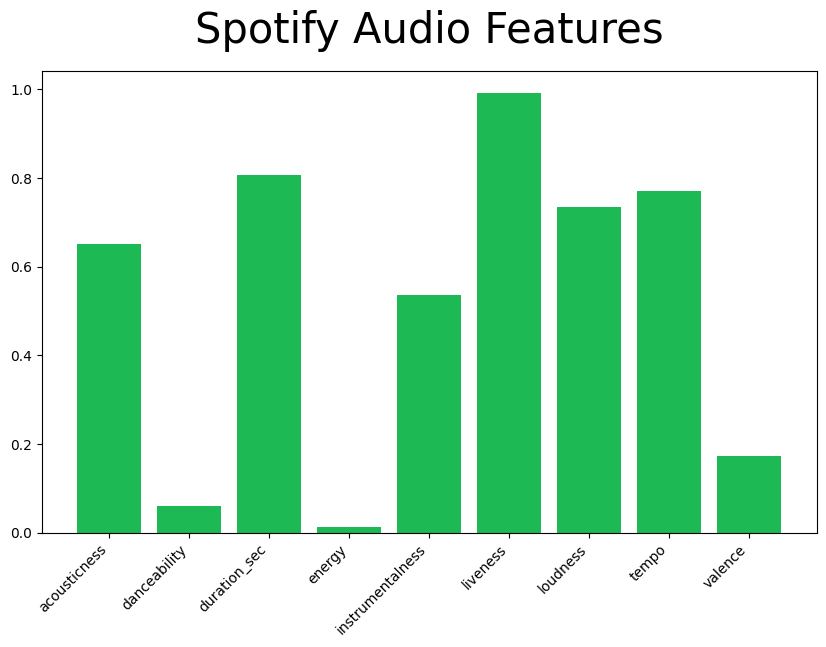

In [76]:
#Make a simple visual to show features
features_visual = ['acousticness', 'danceability', 'energy', 
            'instrumentalness', 'liveness', 'loudness', 'valence']

values = np.random.rand(len(features))

#Bar chart with green for Spotify
plt.figure(figsize=(10, 6))
bars = plt.bar(features, values, color='#1DB954')

plt.title("Spotify Audio Features", fontsize=30, pad=20)
plt.xticks(rotation=45, ha='right')
plt.savefig('images/feature_poster_visual.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import importlib
importlib.reload(gc)

<module 'src.genre_classification' from '/Users/canderson/SpotifyRecommender/src/genre_classification.py'>